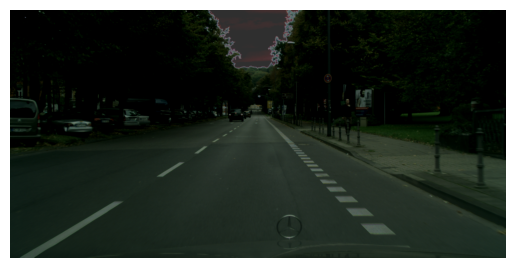

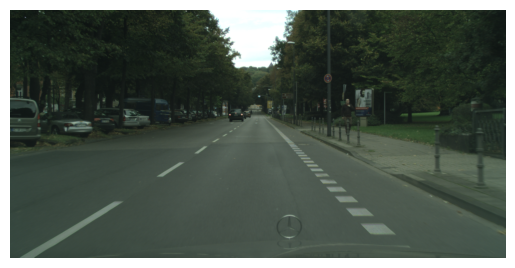

In [1]:
from torchvision.datasets import Cityscapes
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms.functional import to_pil_image

def get_transforms():
    transform = A.Compose([
        A.RandomBrightnessContrast(brightness_limit=(-0.145,-0.14), p=1),
        A.RandomSnow(snow_point_lower=0.8, snow_point_upper=0.9, brightness_coeff=4, always_apply=False, p=0),
        A.RandomFog (fog_coef_lower=0.1, fog_coef_upper=0.8, alpha_coef=0.1, always_apply=False, p=0),
        A.RandomRain (slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=3, brightness_coefficient=0.7, rain_type="drizzle", always_apply=False, p=0),
        A.Solarize(threshold=(128, 128), always_apply=False, p=1),
        ToTensorV2()
    ])
    return transform

class AlbumentationsCityscapes(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, mask = self.dataset[idx]
        image = np.array(image)
        mask = np.array(mask)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, mask

# Original Cityscapes dataset
original_dataset = Cityscapes(root='./data', split='train', mode='fine', target_type='semantic')

# Applying Albumentations transforms
transformed_dataset = AlbumentationsCityscapes(dataset=original_dataset, transform=get_transforms())

img, label = transformed_dataset[6]
img_or, label_or = original_dataset[6]
plt.imshow(transforms.functional.to_pil_image(img, mode=None))
plt.axis('off')
plt.savefig("images/night_image2.png", bbox_inches='tight', pad_inches = 0)
plt.show()
plt.imshow(img_or)
plt.axis('off')
plt.show()

In [3]:
# Ensure the output directory exists
image_dir = './augmented_data/images'
os.makedirs(image_dir, exist_ok=True)

# Loop through the original dataset to maintain the original filenames
for idx, (image, _) in enumerate(original_dataset):
    img, _ = transformed_dataset[idx]
    original_image_path = original_dataset.images[idx]
    original_filename = os.path.basename(original_image_path)
    img_pil = to_pil_image(img)
    img_path = os.path.join(image_dir, original_filename)
    img_pil.save(img_path)
    print(f'Saved image {idx + 1}/{len(transformed_dataset)} using original filename: {original_filename}')

print('Completed saving all augmented images.')

Saved image 1/2975 using original filename: aachen_000000_000019_leftImg8bit.png
Saved image 2/2975 using original filename: aachen_000001_000019_leftImg8bit.png
Saved image 3/2975 using original filename: aachen_000002_000019_leftImg8bit.png
Saved image 4/2975 using original filename: aachen_000003_000019_leftImg8bit.png
Saved image 5/2975 using original filename: aachen_000004_000019_leftImg8bit.png
Saved image 6/2975 using original filename: aachen_000005_000019_leftImg8bit.png
Saved image 7/2975 using original filename: aachen_000006_000019_leftImg8bit.png
Saved image 8/2975 using original filename: aachen_000007_000019_leftImg8bit.png
Saved image 9/2975 using original filename: aachen_000008_000019_leftImg8bit.png
Saved image 10/2975 using original filename: aachen_000009_000019_leftImg8bit.png
Saved image 11/2975 using original filename: aachen_000010_000019_leftImg8bit.png
Saved image 12/2975 using original filename: aachen_000011_000019_leftImg8bit.png
Saved image 13/2975 using

In [5]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Check if the file exists
file_path = './augmented_data/gtFine/train/bochem/bochum_000000_032169_gtFine_labelIds.png'
            './augmented_data/gtFine/train/bochum/bochum_000000_032169_gtFine_labelIds.png'
print("Does the file exist?", os.path.exists(file_path))

Current working directory: c:\Users\lucma\Tue_code\5LSM0\FinalAssignment
Does the file exist? True
